In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

data = pd.read_csv("JSTdatasetR6_CSV.csv")

# Task to do:
# Drop useless columns Completed
# Drop all rows prior to 1946 Completed
# Drop any feature which has more than 25% missing data Completed
# Drop any sample which has more than 25% missing data
# Create groups of data based on similarities -> Create new label for these periods

print(data.axes)

data.drop(["iso", "ifs"], axis=1, inplace=True)

data['year'] = data['year'].astype(int)

sample_begin_date = 1980

data = data[data['year'] >= sample_begin_date]
print(data.shape)



[RangeIndex(start=0, stop=2718, step=1), Index(['year', 'country', 'iso', 'ifs', 'pop', 'rgdpmad', 'rgdpbarro',
       'rconsbarro', 'gdp', 'iy', 'cpi', 'ca', 'imports', 'exports', 'narrowm',
       'money', 'stir', 'ltrate', 'hpnom', 'unemp', 'wage', 'debtgdp',
       'revenue', 'expenditure', 'xrusd', 'tloans', 'tmort', 'thh', 'tbus',
       'bdebt', 'lev', 'ltd', 'noncore', 'crisisJST', 'crisisJST_old', 'peg',
       'peg_strict', 'peg_type', 'peg_base', 'JSTtrilemmaIV', 'eq_tr',
       'housing_tr', 'bond_tr', 'bill_rate', 'rent_ipolated',
       'housing_capgain_ipolated', 'housing_capgain', 'housing_rent_rtn',
       'housing_rent_yd', 'eq_capgain', 'eq_dp', 'eq_capgain_interp',
       'eq_tr_interp', 'eq_dp_interp', 'bond_rate', 'eq_div_rtn', 'capital_tr',
       'risky_tr', 'safe_tr'],
      dtype='object')]
(738, 57)


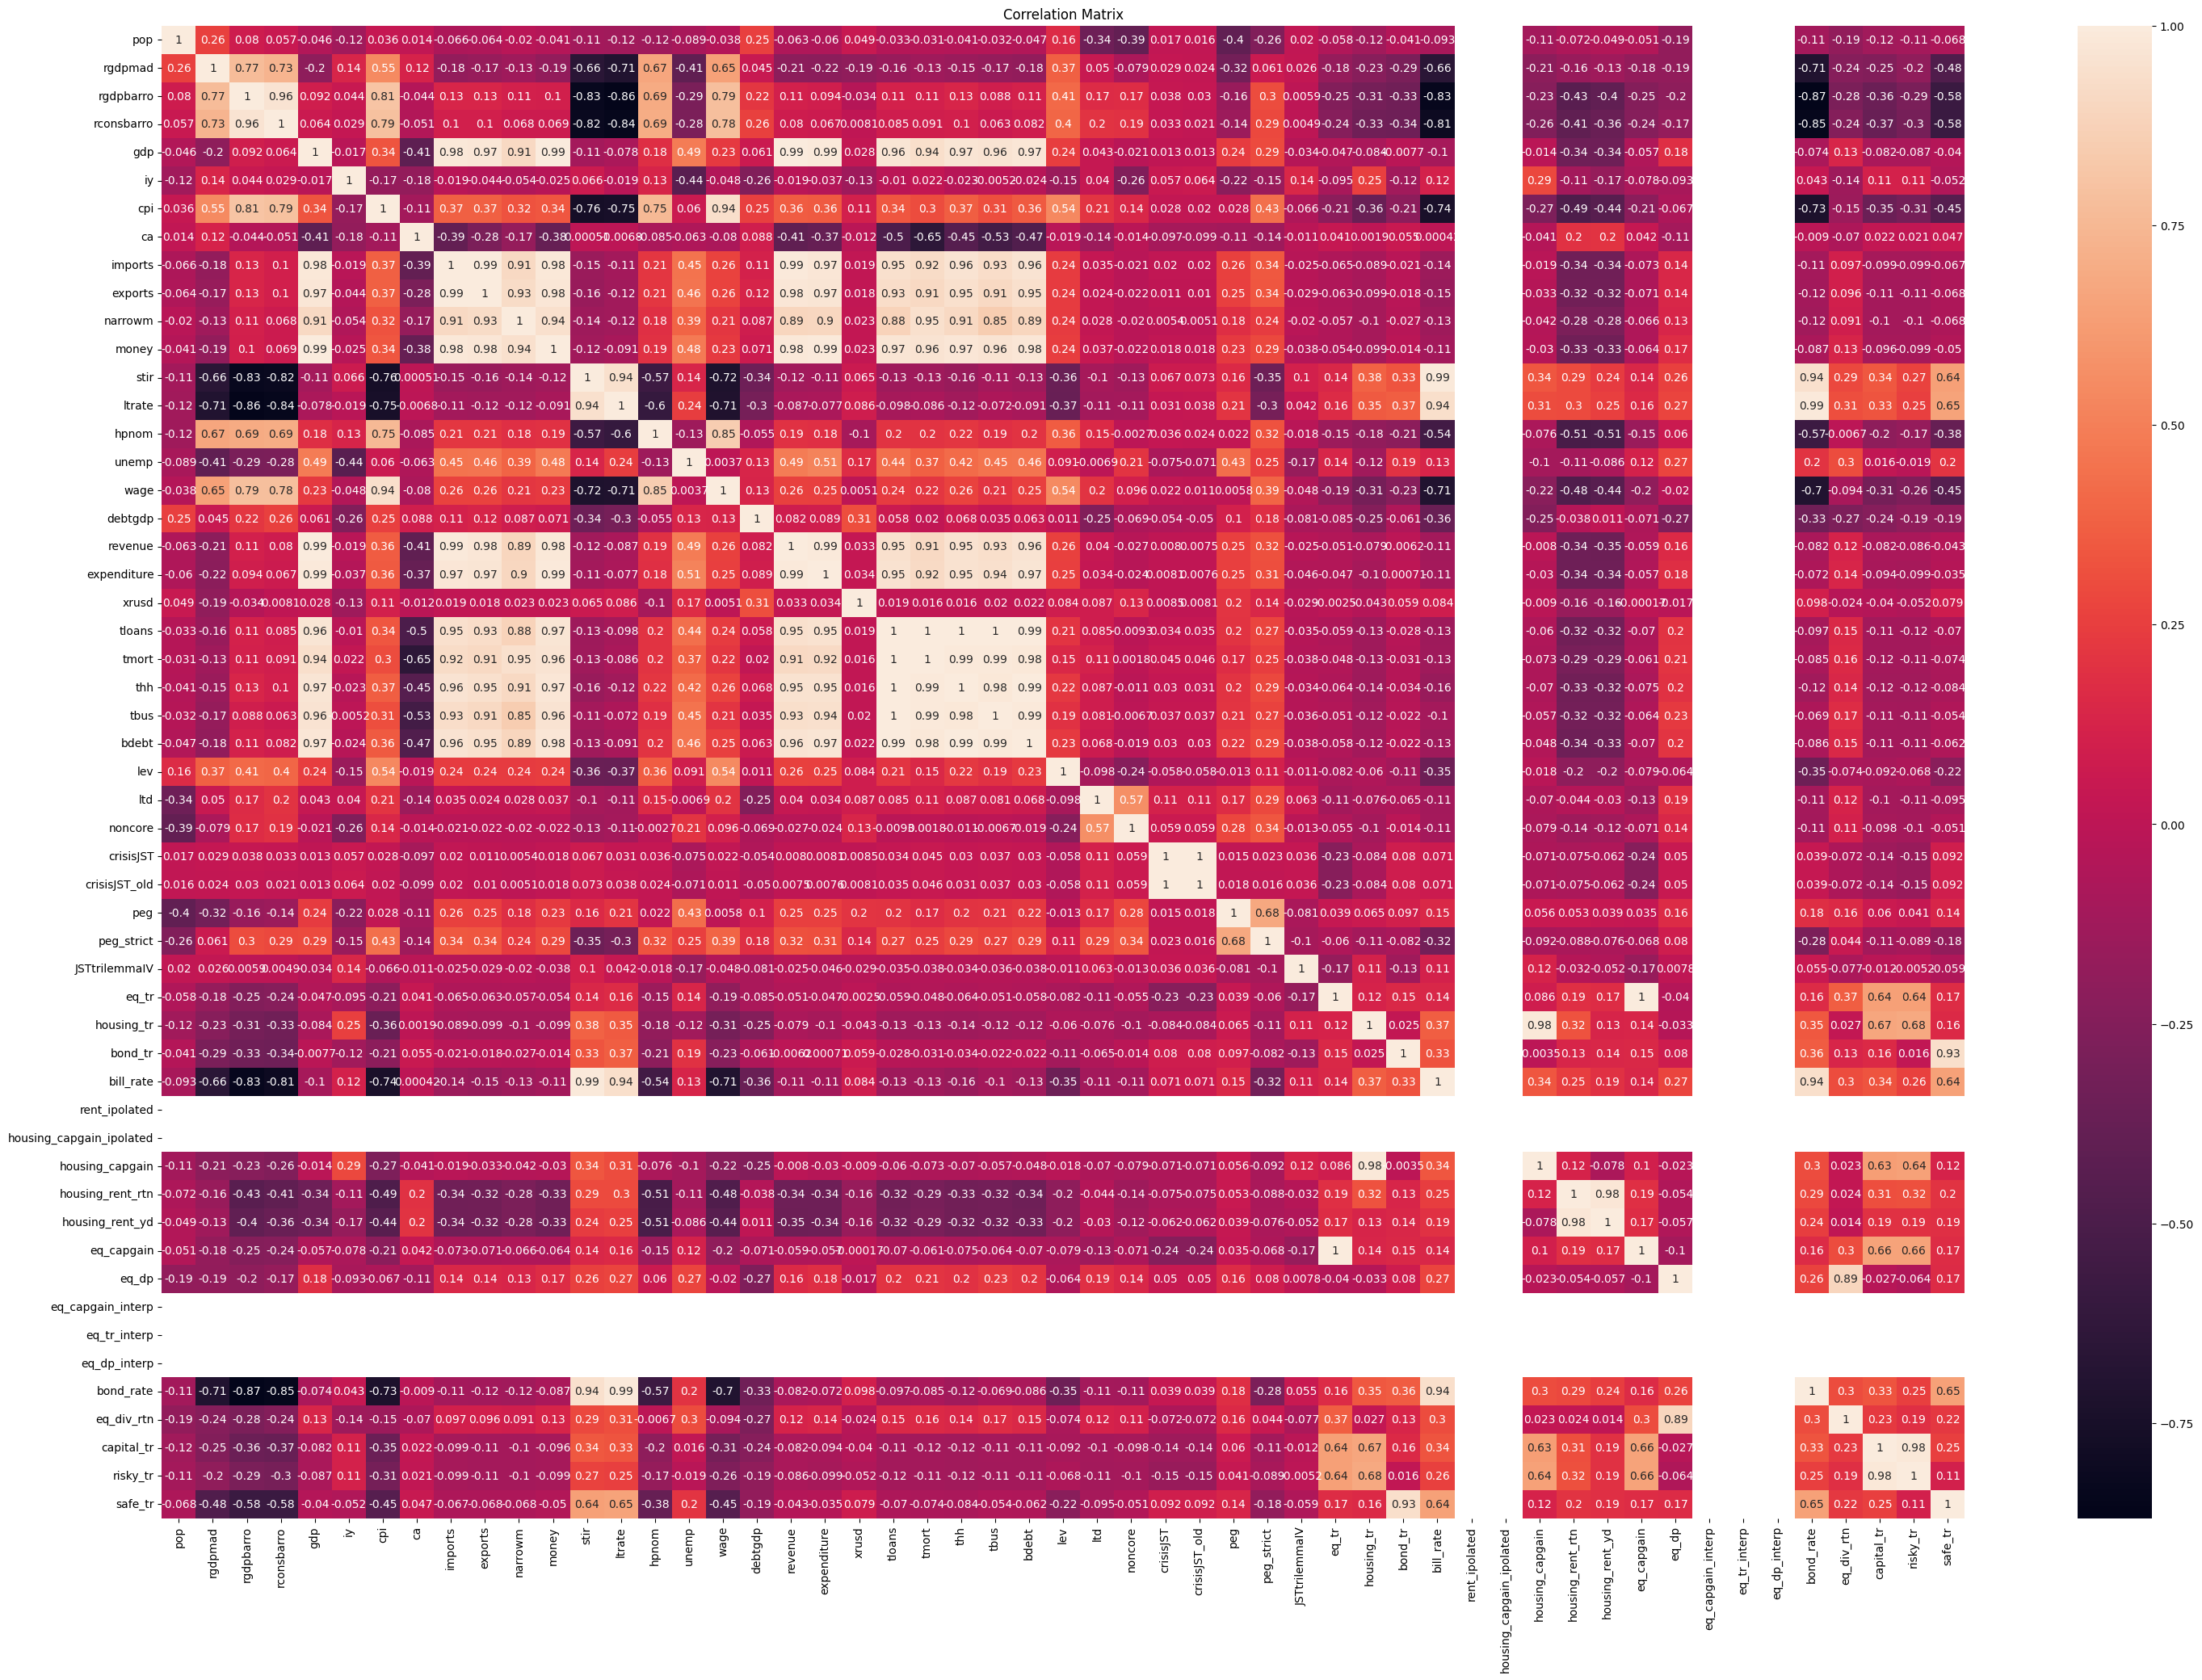

pop               pop                 1.000000
expenditure       expenditure         1.000000
ltd               ltd                 1.000000
lev               lev                 1.000000
bdebt             bdebt               1.000000
tbus              tbus                1.000000
thh               thh                 1.000000
tmort             tmort               1.000000
tloans            tloans              1.000000
xrusd             xrusd               1.000000
rgdpmad           rgdpmad             1.000000
exports           exports             1.000000
revenue           revenue             1.000000
debtgdp           debtgdp             1.000000
wage              wage                1.000000
unemp             unemp               1.000000
hpnom             hpnom               1.000000
ltrate            ltrate              1.000000
stir              stir                1.000000
money             money               1.000000
noncore           noncore             1.000000
crisisJST    

In [203]:
correlation_data = data.drop(["country", "year", "peg_type", "peg_base"], axis=1)
correlation_data[correlation_data.columns] = correlation_data[correlation_data.columns].apply(pd.to_numeric)

correlation_matrix = correlation_data.corr()
plt.figure(figsize=(36,24))
sb.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

high_correlations = correlation_matrix[correlation_matrix > 0.75]
high_correlations = high_correlations.unstack().dropna().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(high_correlations)

In [204]:
rows_to_drop = data.index[data["year"] == 2020]
data.drop(index=rows_to_drop, inplace=True)

data.drop(["peg_base", "JSTtrilemmaIV", "thh", "tbus"], axis=1, inplace=True)

label_encoder = LabelEncoder()
data['peg_type'] = label_encoder.fit_transform(data['peg_type'])


In [205]:
drop_threshold = 0.25
num_missing_values = data.isnull().sum()
missing_percentage_feature = num_missing_values/len(data)
columns_to_drop = data.columns[missing_percentage_feature >= drop_threshold]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

print(columns_to_drop)
print(data.shape)

drop_threshold = 0.25
max_missing_features = len(data.columns) * drop_threshold

rows_to_drop = data.index[data.isnull().sum(axis=1) > max_missing_features]
for idx in rows_to_drop:
    print(data.loc[idx].to_dict())
data.drop(index=rows_to_drop, inplace=True)

print(data.shape)

Index(['rent_ipolated', 'housing_capgain_ipolated', 'eq_capgain_interp',
       'eq_tr_interp', 'eq_dp_interp'],
      dtype='object')
(720, 48)
{'year': 1980, 'country': 'Canada', 'pop': 24593.3, 'rgdpmad': 16175.70639, 'rgdpbarro': 66.96129729, 'rconsbarro': 66.0493, 'gdp': 322.748, 'iy': 0.232965425, 'cpi': 56.20678, 'ca': -7.273357137, 'imports': 71.35324993, 'exports': 79.20847992, 'narrowm': 34.75, 'money': 146.923, 'stir': 12.79333333, 'ltrate': 12.48416667, 'hpnom': 43.59936315, 'unemp': 7.5368, 'wage': 56.11556141, 'debtgdp': 0.456317866, 'revenue': 57.491, 'expenditure': 65.52, 'xrusd': 1.194699999, 'tloans': 204.222, 'tmort': 76.136, 'bdebt': 343.0, 'lev': 2.389739752, 'ltd': 88.19072723, 'noncore': 51.16693115, 'crisisJST': 0.0, 'crisisJST_old': 0.0, 'peg': 1.0, 'peg_strict': 0.0, 'peg_type': 2, 'eq_tr': nan, 'housing_tr': nan, 'bond_tr': nan, 'bill_rate': nan, 'housing_capgain': nan, 'housing_rent_rtn': nan, 'housing_rent_yd': nan, 'eq_capgain': nan, 'eq_dp': nan, 'bond_ra

In [206]:
drop_threshold = 0.10
num_missing_values = data.isnull().sum()
missing_percentage_feature = num_missing_values/len(data)
columns_to_drop = data.columns[missing_percentage_feature >= drop_threshold]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

print(columns_to_drop)
print(data.shape)

drop_threshold = 0.05
max_missing_features = len(data.columns) * drop_threshold

rows_to_drop = data.index[data.isnull().sum(axis=1) > max_missing_features]
for idx in rows_to_drop:
    print(data.loc[idx].to_dict())
data.drop(index=rows_to_drop, inplace=True)


print(data[data.isnull().sum(axis=1) > max_missing_features])
print(data.shape)


Index([], dtype='object')
(640, 48)
{'year': 2018, 'country': 'Spain', 'pop': 46728.814, 'rgdpmad': 18232.28624, 'rgdpbarro': 106.5944882, 'rconsbarro': 96.98513135, 'gdp': 200205452.0, 'iy': 0.194468523, 'cpi': 212.1015792, 'ca': 3863965.223, 'imports': 64957759.94, 'exports': 70397417.44, 'narrowm': 186281153.2, 'money': 206270887.2, 'stir': -0.280169586, 'ltrate': 1.4225, 'hpnom': 316.5367644, 'unemp': 15.2547, 'wage': 234.6182122, 'debtgdp': 0.975143, 'revenue': 35492296.82, 'expenditure': 38118866.21, 'xrusd': 145.3152838, 'tloans': 201046684.6, 'tmort': nan, 'bdebt': 174106480.0, 'lev': 8.655350951, 'ltd': 99.62712056, 'noncore': 48.44916849, 'crisisJST': 0.0, 'crisisJST_old': 0.0, 'peg': 1.0, 'peg_strict': 1.0, 'peg_type': 2, 'eq_tr': -0.108800001, 'housing_tr': 0.089030489, 'bond_tr': 0.031852674, 'bill_rate': nan, 'housing_capgain': 0.067280173, 'housing_rent_rtn': 0.021750314, 'housing_rent_yd': 0.020379199, 'eq_capgain': -0.136800006, 'eq_dp': 0.03243744, 'bond_rate': 0.0141

In [207]:
data['label'] = data["country"] + "_" + data["year"].astype(str)
data.drop(["year", "country"], axis=1, inplace=True)
print(data.columns)

Index(['pop', 'rgdpmad', 'rgdpbarro', 'rconsbarro', 'gdp', 'iy', 'cpi', 'ca',
       'imports', 'exports', 'narrowm', 'money', 'stir', 'ltrate', 'hpnom',
       'unemp', 'wage', 'debtgdp', 'revenue', 'expenditure', 'xrusd', 'tloans',
       'tmort', 'bdebt', 'lev', 'ltd', 'noncore', 'crisisJST', 'crisisJST_old',
       'peg', 'peg_strict', 'peg_type', 'eq_tr', 'housing_tr', 'bond_tr',
       'bill_rate', 'housing_capgain', 'housing_rent_rtn', 'housing_rent_yd',
       'eq_capgain', 'eq_dp', 'bond_rate', 'eq_div_rtn', 'capital_tr',
       'risky_tr', 'safe_tr', 'label'],
      dtype='object')


In [208]:
for index, sample in data.iterrows():
    for column in data.columns:
        if pd.isnull(sample[column]):
            print(f"{sample["label"]}: {column}: {sample[column]}")

Belgium_1980: debtgdp: nan
Belgium_1981: debtgdp: nan
Switzerland_2016: capital_tr: nan
Switzerland_2016: risky_tr: nan
Switzerland_2017: capital_tr: nan
Switzerland_2017: risky_tr: nan
Switzerland_2018: capital_tr: nan
Switzerland_2018: risky_tr: nan
Switzerland_2019: capital_tr: nan
Switzerland_2019: risky_tr: nan
Denmark_1997: debtgdp: nan
Spain_2017: tmort: nan
Japan_2018: tloans: nan
Japan_2019: tloans: nan
Portugal_1980: hpnom: nan
Portugal_1981: hpnom: nan
Portugal_1982: hpnom: nan
Portugal_1983: hpnom: nan
Portugal_1984: hpnom: nan
Portugal_1985: hpnom: nan
Portugal_1986: hpnom: nan
Portugal_1987: hpnom: nan


In [209]:
rows_with_missing = data[data.isnull().any(axis=1)]
data.drop(rows_with_missing.index, inplace=True)


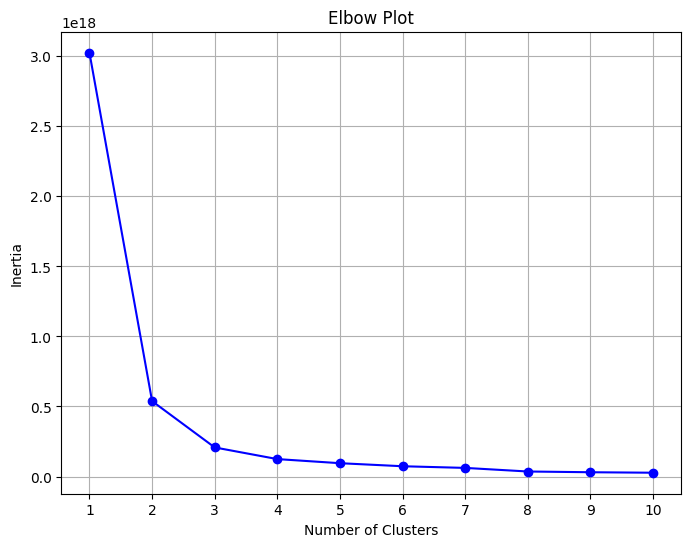

In [210]:
labels = data['label']
df_data = data.drop(columns=['label'])
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

DataFrame with Cluster Labels and Original Labels:
                pop       rgdpmad   rgdpbarro  rconsbarro           gdp  \
110    14615.900000  14411.839160   61.111800   59.161000  1.344240e+05   
111    14923.260000  14660.335610   62.071106   61.118900  1.521430e+05   
112    15162.000000  14411.819020   59.557558   61.197400  1.756150e+05   
113    15348.000000  14238.923640   61.596615   61.426600  1.891570e+05   
114    15510.000000  15062.411350   64.190629   61.907400  2.133780e+05   
115    15695.000000  15638.356160   66.145274   63.963800  2.349730e+05   
116    15900.000000  15757.169810   66.557721   63.646100  2.602420e+05   
117    16137.000000  16293.301110   69.185337   64.846500  2.857060e+05   
118    16400.000000  16752.256100   70.833203   66.709500  3.238920e+05   
119    16681.000000  17194.412800   72.411129   69.052000  3.675260e+05   
120    16956.000000  17172.682240   70.912858   68.579000  4.038520e+05   
121    17202.000000  16743.323990   70.083106   6

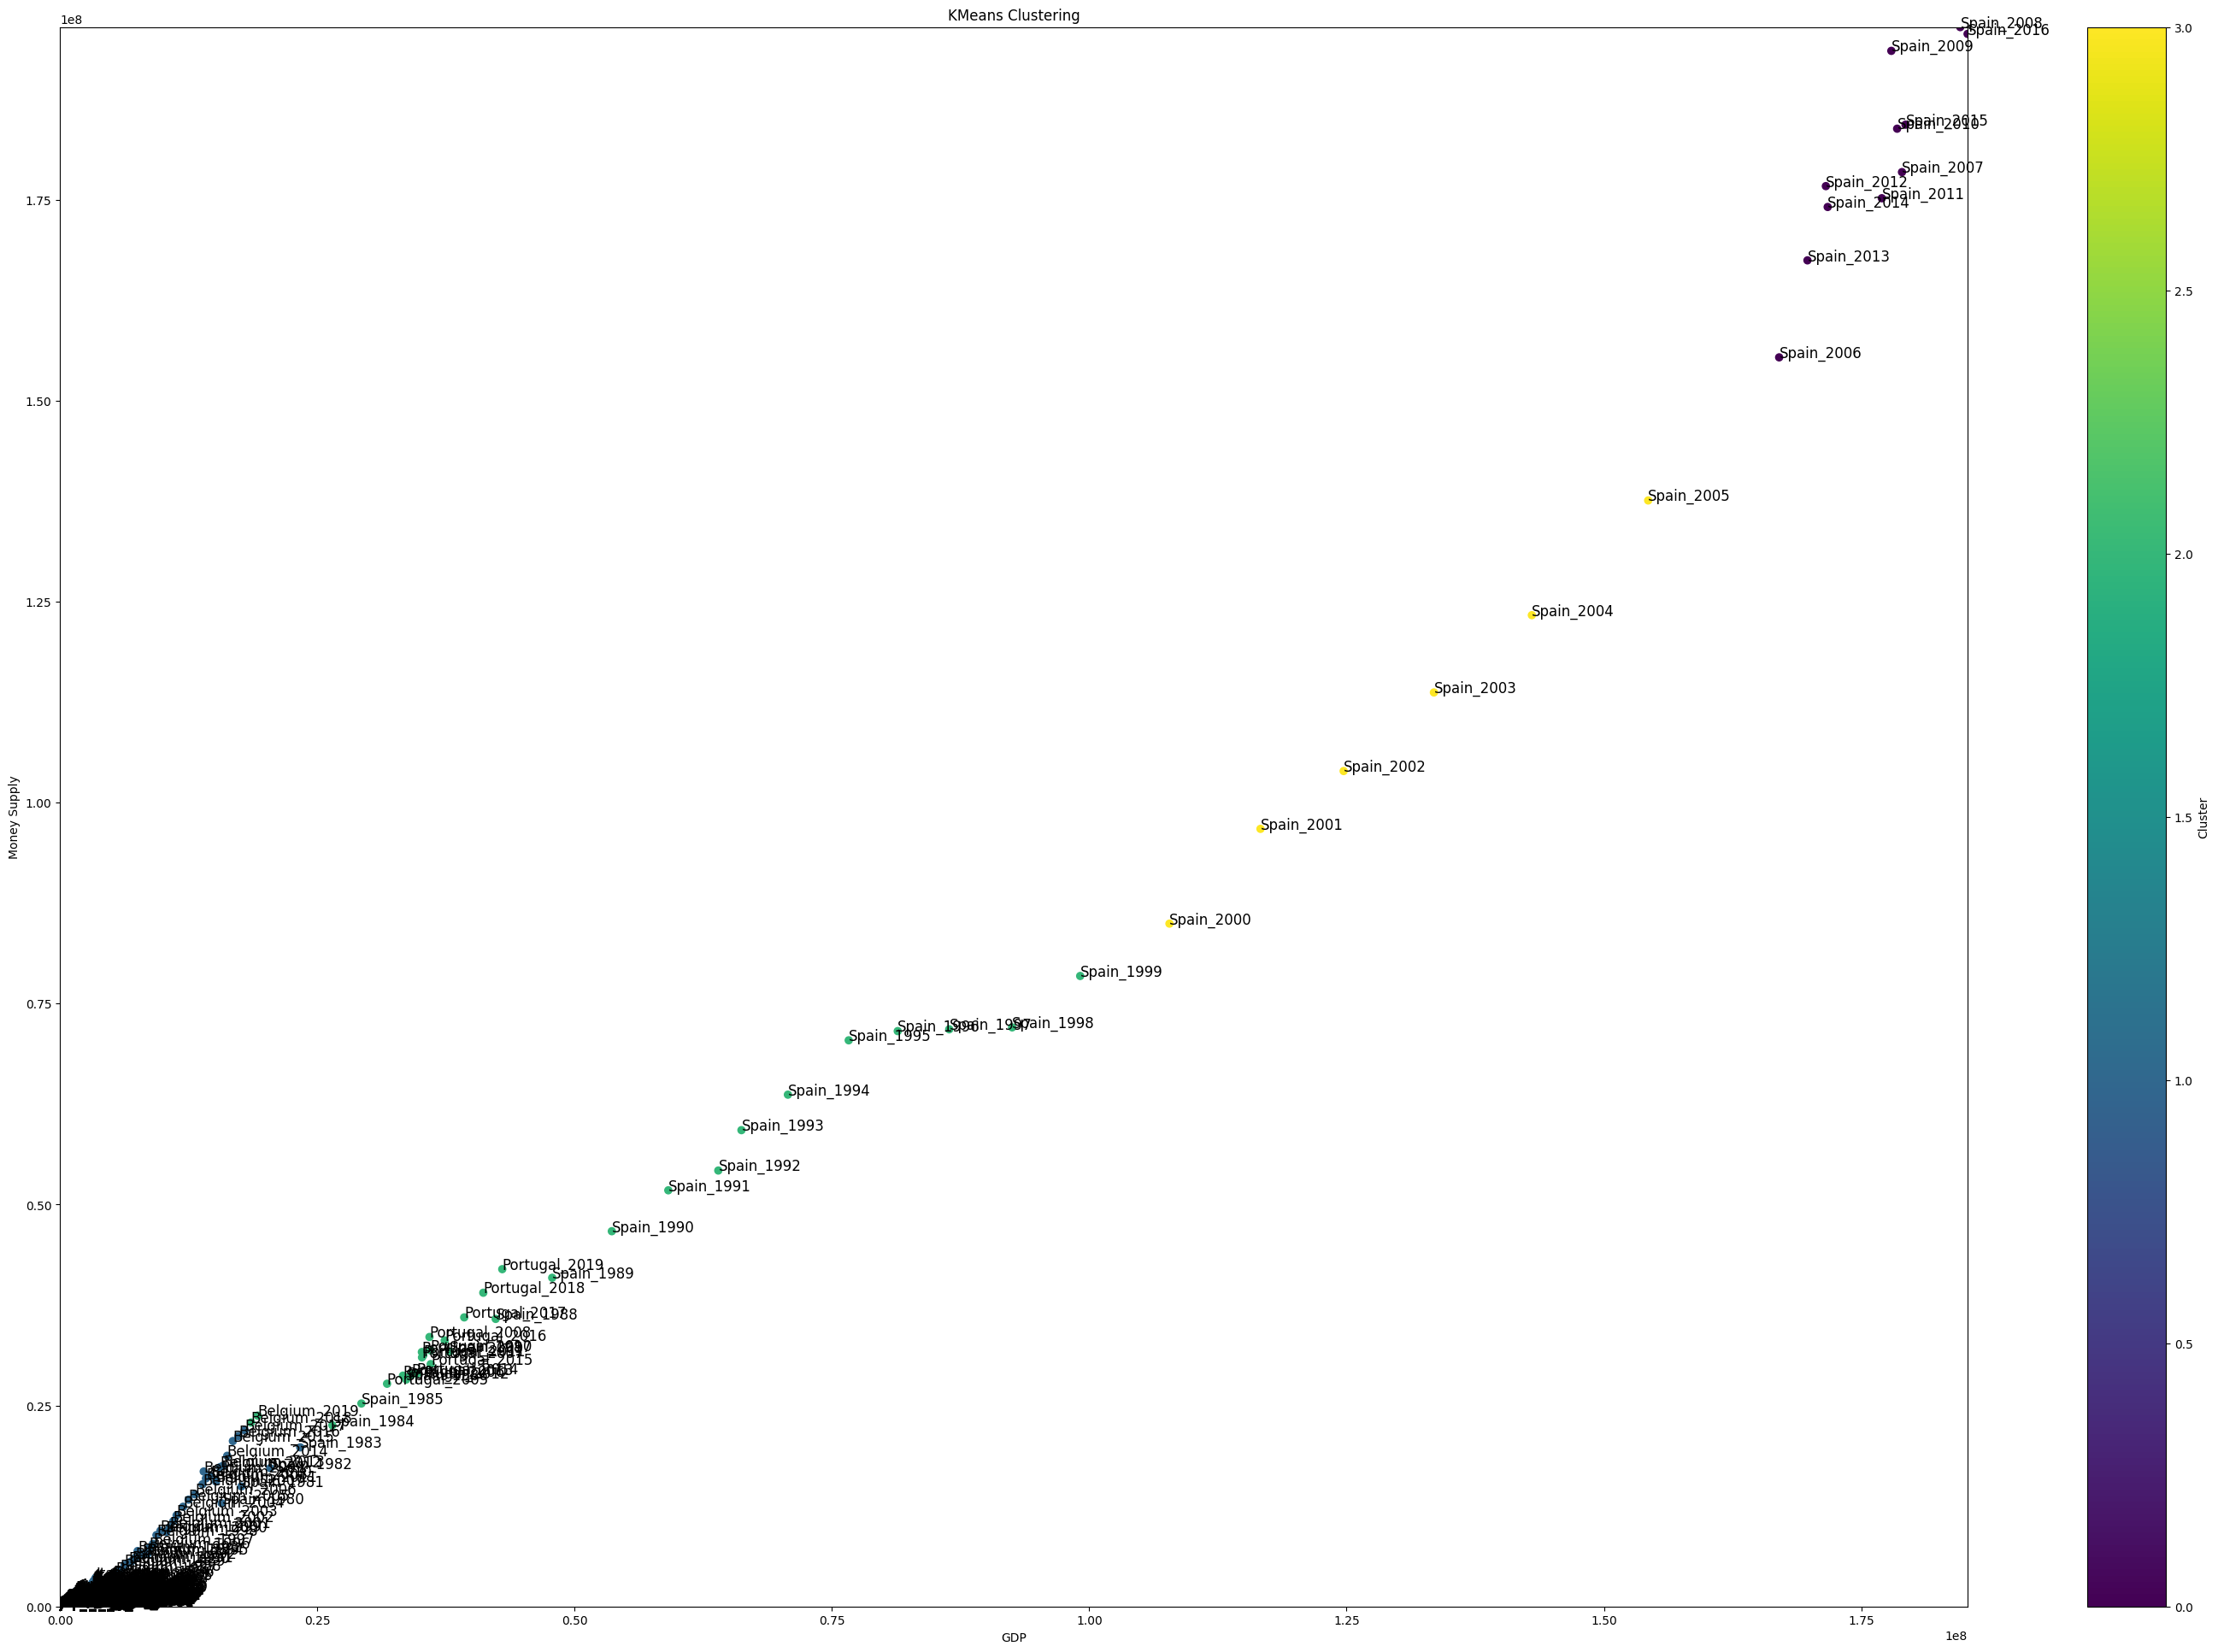

In [211]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Example: 2 clusters
cluster_labels = kmeans.fit_predict(df_data)

df_data['cluster'] = cluster_labels
df_data['label'] = labels

print("DataFrame with Cluster Labels and Original Labels:")
print(df_data)

plt.figure(figsize=(36, 24))

plt.scatter(df_data['gdp'], df_data['money'], c=cluster_labels)
plt.title('KMeans Clustering')
plt.xlabel('GDP')
plt.ylabel('Money Supply')
plt.ylim(0, df_data['money'].max())
plt.xlim(0, df_data['gdp'].max())
plt.colorbar(label='Cluster')

# Annotate points with labels
for label, x, y in zip(df_data['label'], df_data['gdp'], df_data['money']):
    plt.text(x, y, label, fontsize=12)

plt.show()

In [214]:
print(f"{df_data["label"]}: {df_data["gdp"]}")

110       Australia_1980
111       Australia_1981
112       Australia_1982
113       Australia_1983
114       Australia_1984
115       Australia_1985
116       Australia_1986
117       Australia_1987
118       Australia_1988
119       Australia_1989
120       Australia_1990
121       Australia_1991
122       Australia_1992
123       Australia_1993
124       Australia_1994
125       Australia_1995
126       Australia_1996
127       Australia_1997
128       Australia_1998
129       Australia_1999
130       Australia_2000
131       Australia_2001
132       Australia_2002
133       Australia_2003
134       Australia_2004
135       Australia_2005
136       Australia_2006
137       Australia_2007
138       Australia_2008
139       Australia_2009
140       Australia_2010
141       Australia_2011
142       Australia_2012
143       Australia_2013
144       Australia_2014
145       Australia_2015
146       Australia_2016
147       Australia_2017
148       Australia_2018
149       Australia_2019


In [213]:
cluster_groups = df_data.groupby('cluster')
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    for index, row in group.iterrows():
        money = row['money']
        gdp = row['gdp']
        print(f"Sample Money: {money}, GDP: {gdp}")
    print()

Cluster 0:
Sample Money: 155406853.4, GDP: 167022093.7
Sample Money: 178454808.5, GDP: 178954632.1
Sample Money: 196494212.2, GDP: 184612088.8
Sample Money: 193540694.4, GDP: 177920376.7
Sample Money: 183856696.4, GDP: 178483759.7
Sample Money: 175204957.2, GDP: 176995270.5
Sample Money: 176711915.2, GDP: 171560438.2
Sample Money: 167475661.9, GDP: 169771622.3
Sample Money: 174117125.5, GDP: 171736641.0
Sample Money: 184357684.6, GDP: 179295889.7
Sample Money: 195650801.6, GDP: 185327382.2

Cluster 1:
Sample Money: 65457.0, GDP: 134424.0
Sample Money: 72752.0, GDP: 152143.0
Sample Money: 81035.0, GDP: 175615.0
Sample Money: 92562.0, GDP: 189157.0
Sample Money: 105399.0, GDP: 213378.0
Sample Money: 120667.0, GDP: 234973.0
Sample Money: 131643.0, GDP: 260242.0
Sample Money: 148219.0, GDP: 285706.0
Sample Money: 173005.0, GDP: 323892.0
Sample Money: 207473.9605, GDP: 367526.0
Sample Money: 229475.8015, GDP: 403852.0
Sample Money: 234016.7225, GDP: 414473.0
Sample Money: 243383.9018, GDP: 